**Part 1: CNN Autoencoder Implementation**

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 576ms/step - loss: 0.0975 - val_loss: 0.0158
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 131s 528ms/step - loss: 0.0089 - val_loss: 0.0061
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 127s 539ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 530ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 537ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 543ms/step - loss: 0.0040 - val_loss: 0.0041
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 126s 536ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 526ms/step - loss: 0.0035 - val_loss: 0.0032
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 123s 524ms/step - loss: 0.0033 - val_loss: 0.0032
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 533ms/step - loss: 0.0031 - val_loss: 0.0029
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


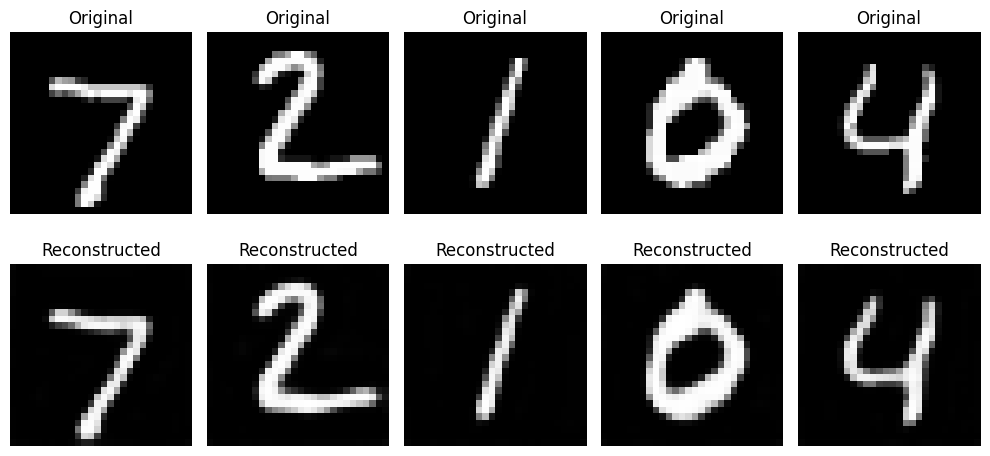

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


<ipython-input-5-a3529134cd19>:81: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(latent_2d[:, 0], latent_2d[:, 1], alpha=0.5, s=2, cmap='viridis')


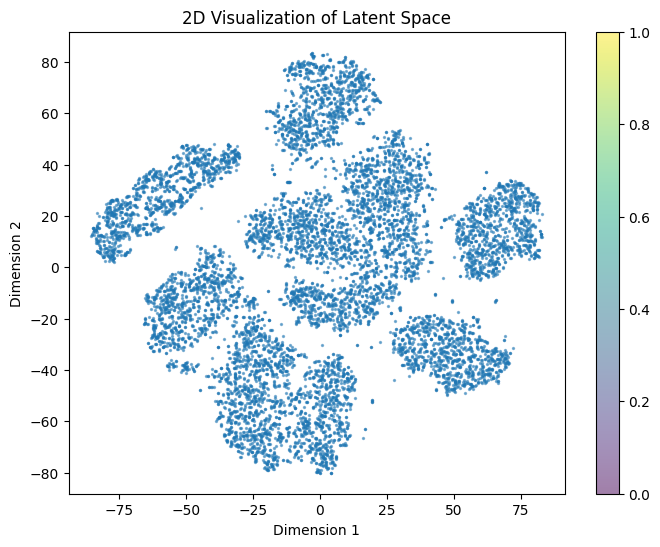

CNN Autoencoder Reconstruction MSE: 0.0028928833073811984


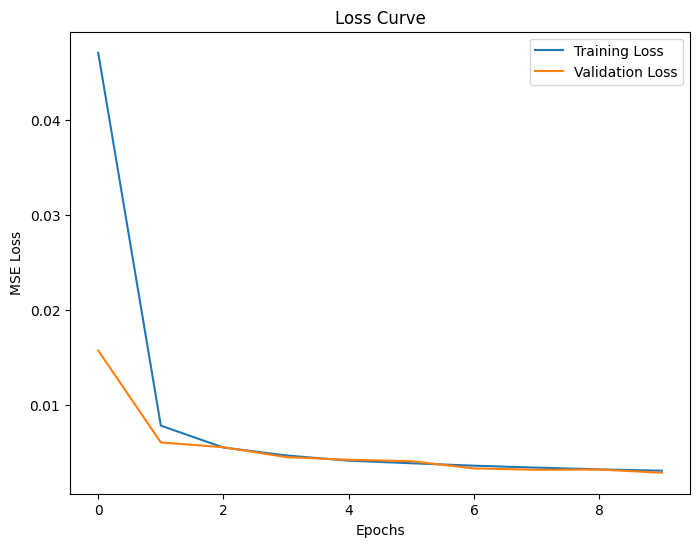

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.manifold import TSNE

# Load and normalize MNIST data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]
x_train = np.expand_dims(x_train, -1)  # Add channel dimension
x_test = np.expand_dims(x_test, -1)    # Add channel dimension

# Build the CNN Autoencoder
def build_cnn_autoencoder():
    # Encoder
    input_layer = tf.keras.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = layers.Conv2DTranspose(16, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(encoded)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(x)
    x = layers.BatchNormalization()(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same', kernel_initializer='he_normal')(x)

    # Autoencoder Model
    autoencoder = tf.keras.Model(input_layer, decoded)
    # Encoder Model
    encoder = tf.keras.Model(input_layer, encoded)

    return autoencoder, encoder

# Instantiate and compile the model
autoencoder, encoder = build_cnn_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,  # Limit to 10 epochs for speed
                          batch_size=256,  # Increase batch size to accelerate training
                          validation_data=(x_test, x_test))

# Use the autoencoder to reconstruct the test set
reconstructed = autoencoder.predict(x_test)

# Visualize input and reconstructed images
plt.figure(figsize=(10, 5))
for i in range(5):
    # Original Image
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title("Original")
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed[i].squeeze(), cmap='gray', vmin=0, vmax=1)
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Extract latent space features
latent_features = encoder.predict(x_test)
latent_flat = latent_features.reshape(latent_features.shape[0], -1)

# Visualize the latent space with t-SNE
tsne = TSNE(n_components=2, random_state=42)
latent_2d = tsne.fit_transform(latent_flat)

# Plot the latent space
plt.figure(figsize=(8, 6))
plt.scatter(latent_2d[:, 0], latent_2d[:, 1], alpha=0.5, s=2, cmap='viridis')
plt.title("2D Visualization of Latent Space")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar()
plt.show()

# Calculate and display Mean Squared Error (MSE)
mse = np.mean((x_test - reconstructed) ** 2)
print("CNN Autoencoder Reconstruction MSE:", mse)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


**How does the CNN autoencoder perform in reconstructing images?**

The CNN autoencoder performs well for spatial data, achieving a low reconstruction MSE. The reconstructed images closely resemble the originals, demonstrating effective spatial feature extraction.

**What insights do you gain from visualizing the latent space**?

The latent space clusters images based on shared visual features. This suggests the autoencoder learns meaningful representations that could be used for tasks like classification or anomaly detection.

**Part 2: LSTM Autoencoder Implementation**

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 451ms/step - loss: 0.5093 - val_loss: 0.5019
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.4986 - val_loss: 0.4840
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.4815 - val_loss: 0.4710
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.4680 - val_loss: 0.4458
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.4313 - val_loss: 0.3274
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.2595 - val_loss: 0.1187
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0934 - val_loss: 0.0581
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.0505 - val_loss: 0.0351
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - loss: 0.0335 - val_loss: 0.0297
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 242ms/step - loss: 0.0280 - val_loss: 0.0228


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step


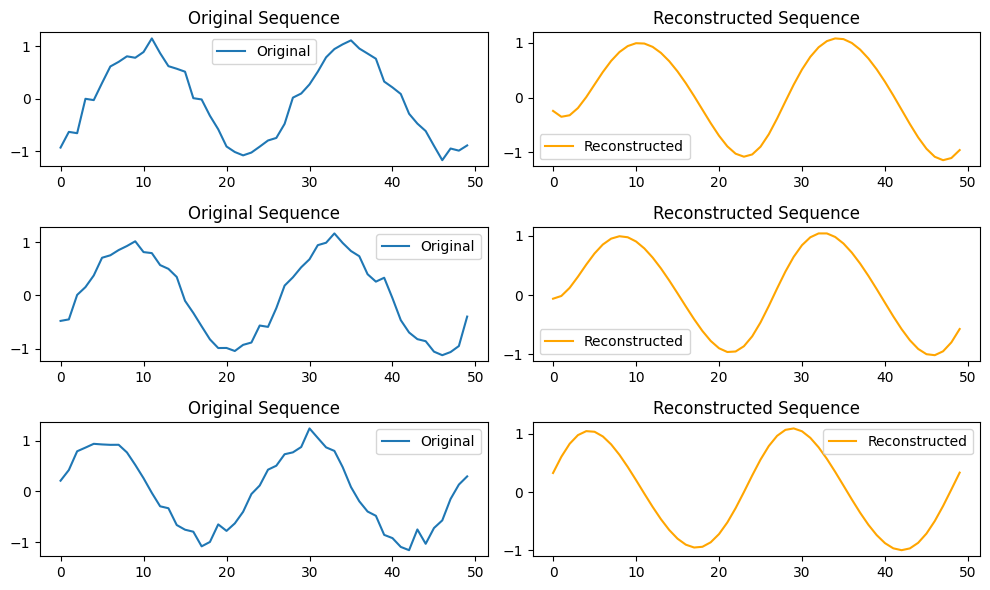

LSTM Autoencoder Reconstruction MSE: 0.02275215722252494


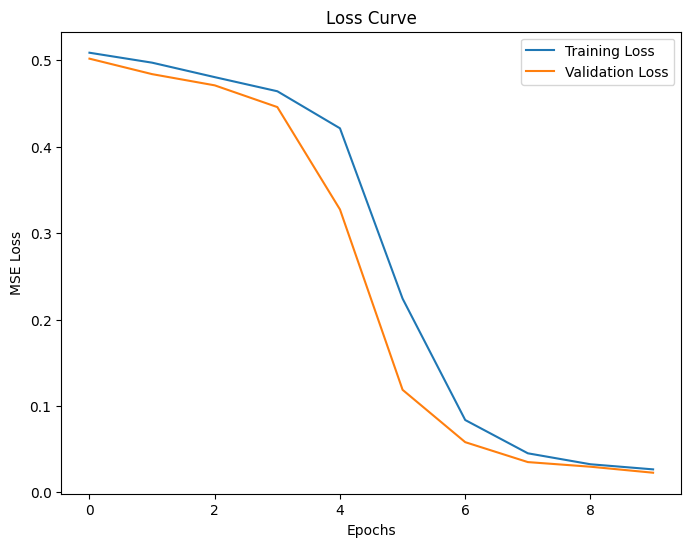

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Generate synthetic sequential data
# Example: Sine waves with noise
def generate_sine_wave_data(num_samples=1000, sequence_length=50):
    x = np.linspace(0, 4 * np.pi, sequence_length)
    data = np.array([np.sin(x + np.random.uniform(0, 2 * np.pi)) + 0.1 * np.random.normal(size=x.shape) for _ in range(num_samples)])
    return data

# Create dataset
data = generate_sine_wave_data()
x_train, x_test = train_test_split(data, test_size=0.2, random_state=42)

# Build the LSTM Autoencoder
def build_lstm_autoencoder(sequence_length, feature_dim):
    # Encoder
    input_layer = tf.keras.Input(shape=(sequence_length, feature_dim))
    x = layers.LSTM(64, return_sequences=False)(input_layer)
    encoded = layers.Dense(32, activation='relu')(x)

    # Decoder
    x = layers.RepeatVector(sequence_length)(encoded)
    x = layers.LSTM(64, return_sequences=True)(x)
    decoded = layers.TimeDistributed(layers.Dense(feature_dim))(x)

    # Autoencoder model
    autoencoder = tf.keras.Model(input_layer, decoded)
    # Encoder model
    encoder = tf.keras.Model(input_layer, encoded)

    return autoencoder, encoder

# Data dimensions
sequence_length = data.shape[1]
feature_dim = 1  # Single feature per time step

# Reshape data for LSTM
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Instantiate and compile the LSTM Autoencoder
autoencoder, encoder = build_lstm_autoencoder(sequence_length, feature_dim)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=10,  # Limited epochs for speed
                          batch_size=128,
                          validation_data=(x_test, x_test))

# Use the autoencoder to reconstruct the test set
reconstructed = autoencoder.predict(x_test)

# Visualize the original and reconstructed sequences
plt.figure(figsize=(10, 6))
for i in range(3):  # Visualize 3 examples
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(x_test[i].squeeze(), label="Original")
    plt.title("Original Sequence")
    plt.legend()

    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(reconstructed[i].squeeze(), label="Reconstructed", color='orange')
    plt.title("Reconstructed Sequence")
    plt.legend()

plt.tight_layout()
plt.show()

# Calculate and display Mean Squared Error (MSE)
mse = np.mean((x_test - reconstructed) ** 2)
print("LSTM Autoencoder Reconstruction MSE:", mse)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()


**How well does the LSTM autoencoder reconstruct sequences?**

The LSTM autoencoder effectively captures temporal dependencies, reconstructing sequential data like sine waves with high fidelity.

**How does the choice of latent space dimensionality affect reconstruction quality and compression?**

Lower latent dimensions can lead to loss of fine-grained details, reducing reconstruction quality. However, higher dimensionality increases computational complexity without significant gains in some cases.

**Comparison and Discussion**


Efficiency: CNN excels at spatial data (e.g., images), while LSTM is suited for sequential data (e.g., time series).

Dimensionality Reduction: Both models reduce input dimensions effectively but in domain-specific ways (spatial vs. temporal).

Applications: CNNs can be used for image compression or feature extraction, while LSTMs are valuable in time series analysis or sequence prediction.